<a href="https://colab.research.google.com/github/Putra1688/MachineLearning-2025-22/blob/main/JS04-Klustering/TG4_2341720248_Rangga_Dwi_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identitas
<table border="1">
  <tbody>
    <tr>
      <td>NAMA</td>
      <td>RANGGA DWI SAPUTRA</td>
    </tr>
    <tr>
      <td>NIM</td>
      <td>2341720248</td>
    </tr>
    <tr>
      <td>KELAS</td>
      <td>TI 3G</td>
    </tr>
  </tbody>
</table>

# 🗃️ **JS04 - Klustering**

## **PRAKTIKUM 1**
Perhitungan **K-Means**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Pertemuan 5/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


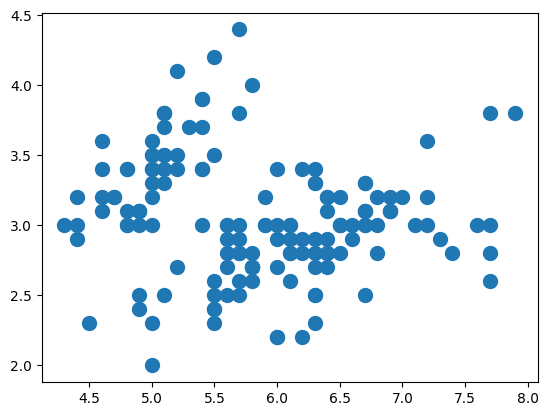

In [10]:
# Plot Data
# plot cluster berdasarkan Sepal Length dan Sepal Width (karena hanya data 4 Dimensi)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [11]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

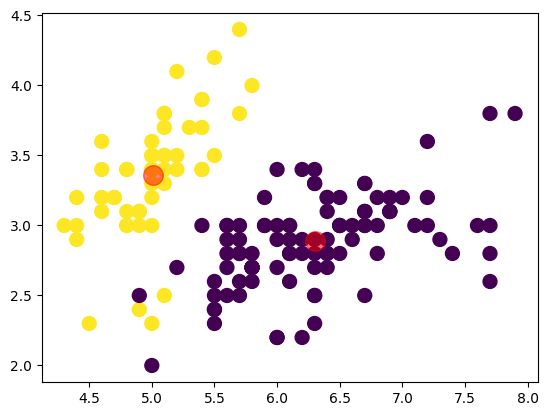

In [12]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [13]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


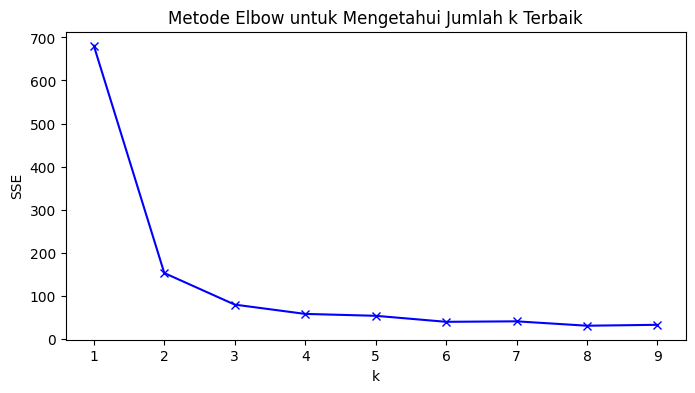

In [15]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [16]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.34540931571815
k=5; SSE=52.95443597694297
k=6; SSE=38.95701115711987
k=7; SSE=40.08418787878788
k=8; SSE=29.881402210510913
k=9; SSE=31.99429126202017


## **PRAKTIKUM 2**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

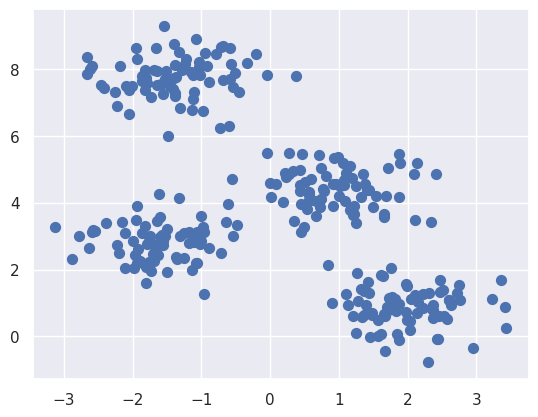

In [18]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

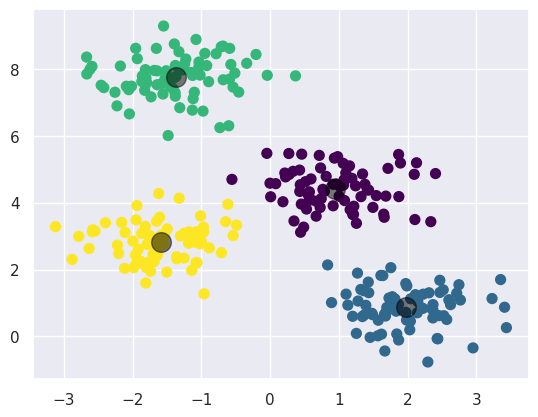

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Algoritma Expectation-Maximization

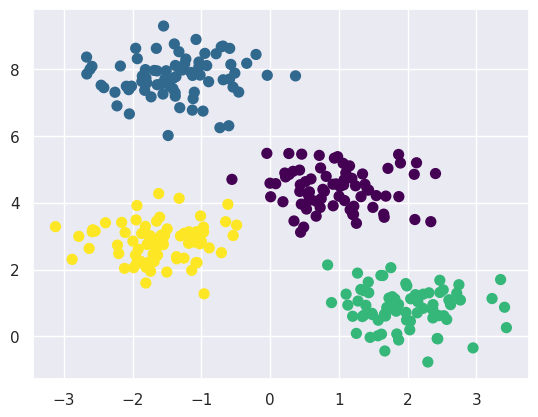

In [21]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Perubahan Random

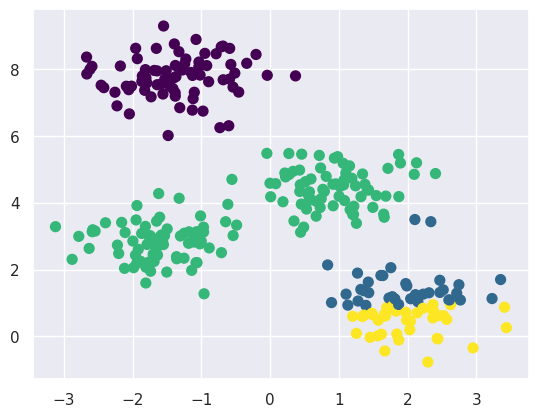

In [22]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Optimalisasi Jumlah Klaster

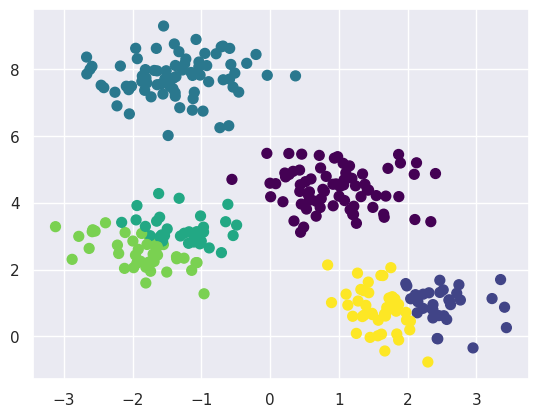

In [23]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### Batas Klaster yang Tidak Selalu Linear

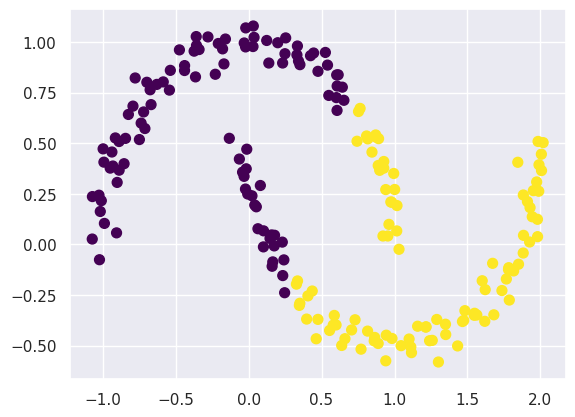

In [24]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


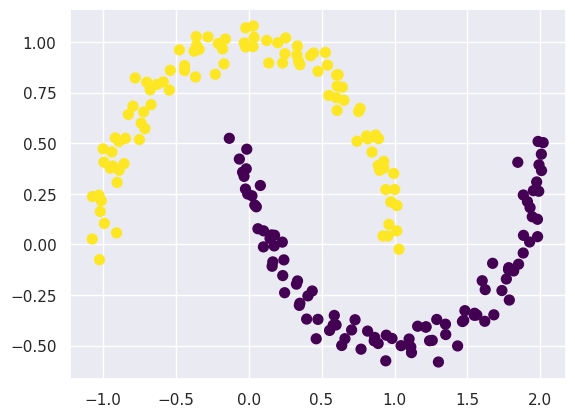

In [25]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### **Contoh Kasus 1: Karakter Angka**

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [27]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

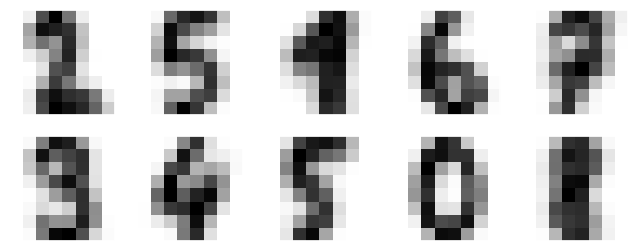

In [28]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [31]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

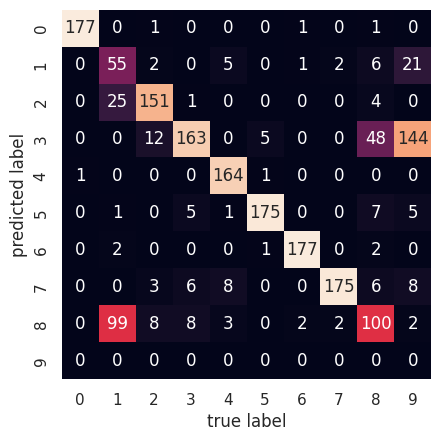

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [33]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

### **Studi Kasus 2 : Kompresi Citra**

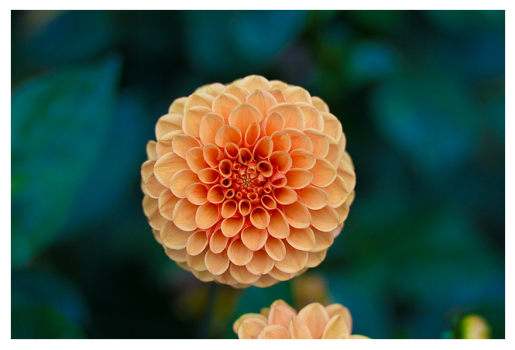

In [34]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [35]:
flower.shape

(427, 640, 3)

In [36]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

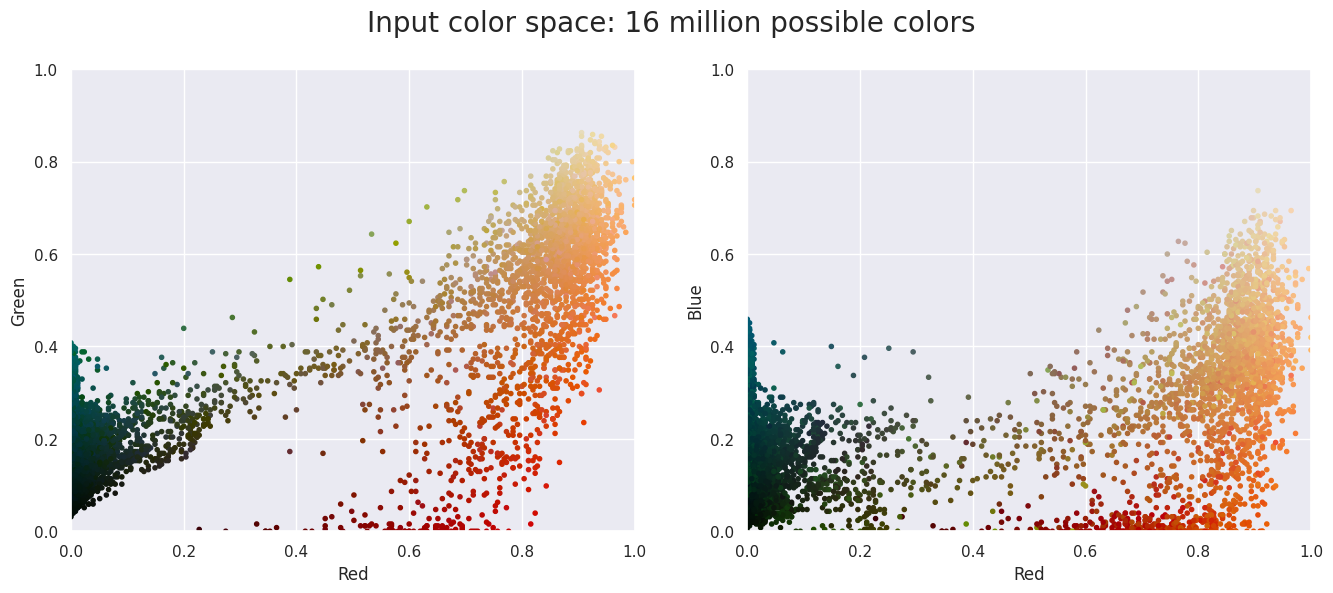

In [38]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

plot_pixels(data, title='Input color space: 16 million possible colors')

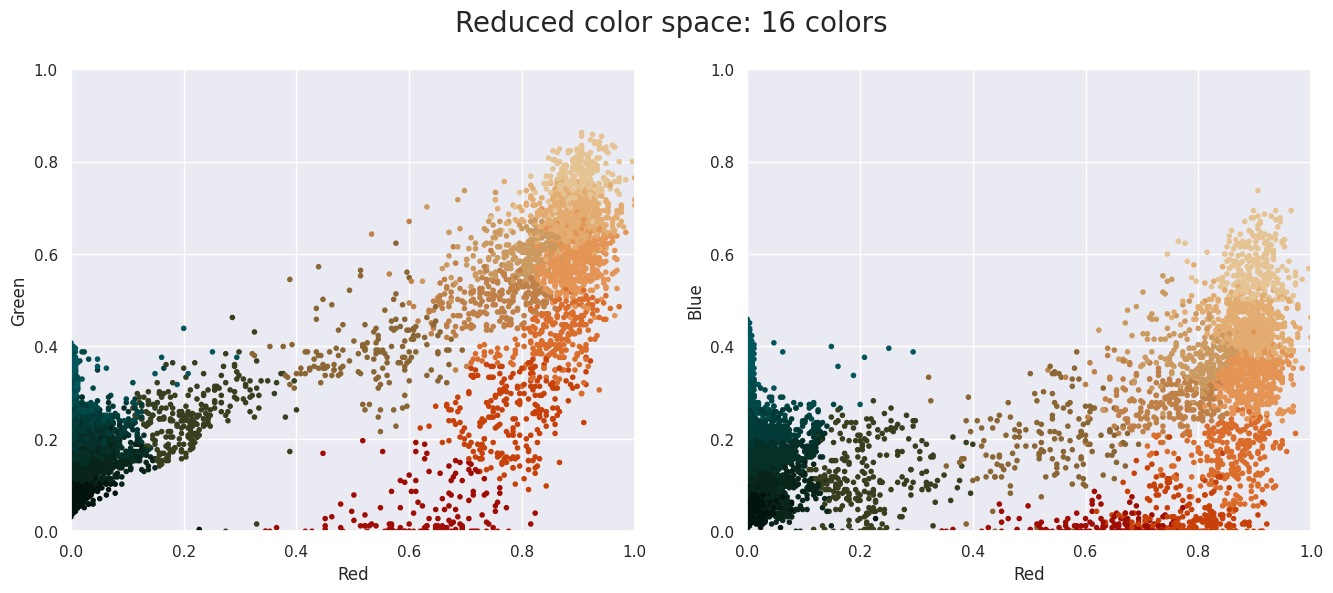

In [39]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

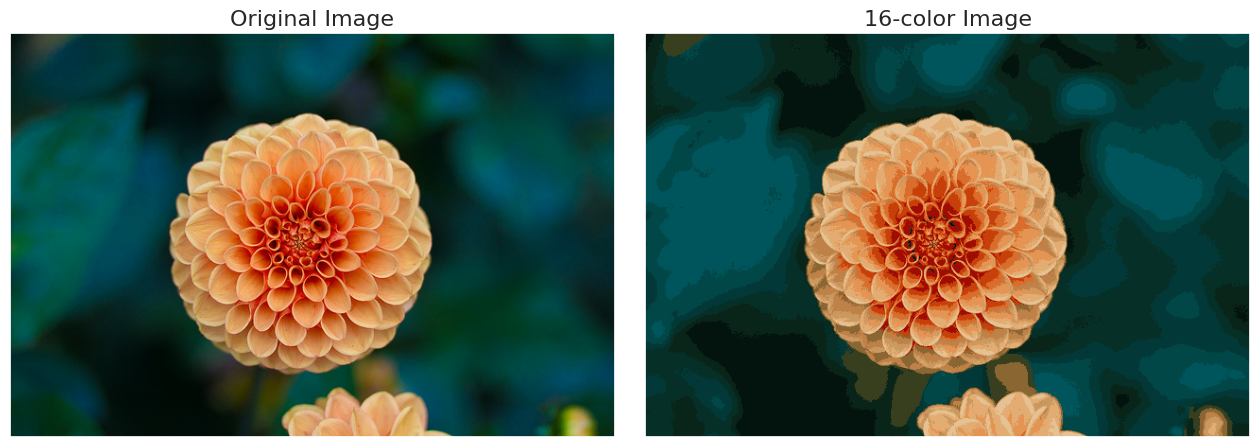

In [40]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## **PRAKTIKUM 3**
Mempelajari **DBSCAN**

In [47]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

print("Data X setelah di-scaling (5 baris pertama):")
print(X[:5])

Data X setelah di-scaling (5 baris pertama):
[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 [ 0.11900101 -1.05397553]
 [ 1.1224246   1.77493654]]


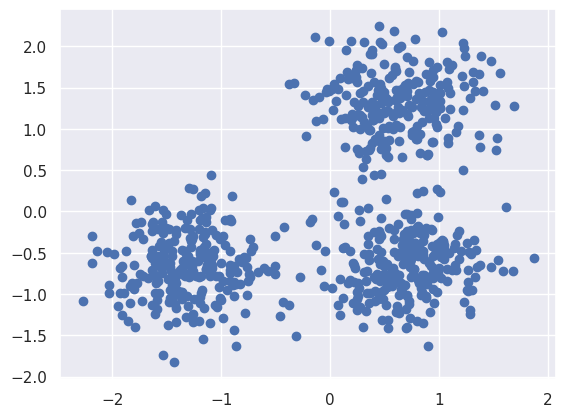

In [51]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Compute DBSCAN

In [53]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


### Evaluasi Kualitas Klasterisasi

In [58]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")

print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


### Visualisasi Hasil Klasterisasi

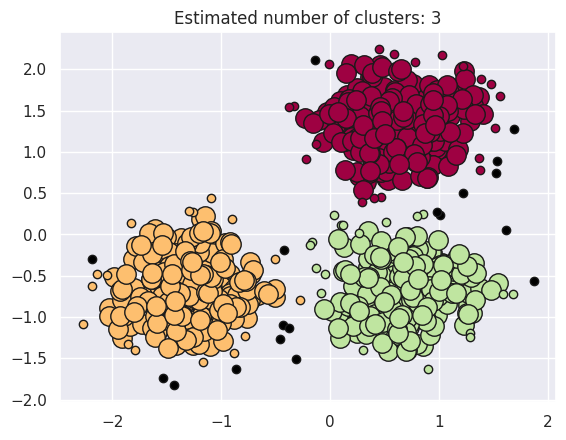

In [59]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = set(labels)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## **TUGAS PRAKTIKUM**

### Tugas **K-Means**

In [61]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Pertemuan 5/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Fitur yang dipilih :

*   Annual Income
*   Spending Score

Karena kombinasi keduanya memberikan wawasan bisnis yang paling relevan dan dapat ditindaklanjuti (actionable) untuk segmentasi pelanggan di sebuah mal


In [62]:
X = df.iloc[:, [3, 4]].values

Elbow Method, yang merupakan cara paling umum untuk membantu Anda menentukan jumlah cluster (k) terbaik secara visual

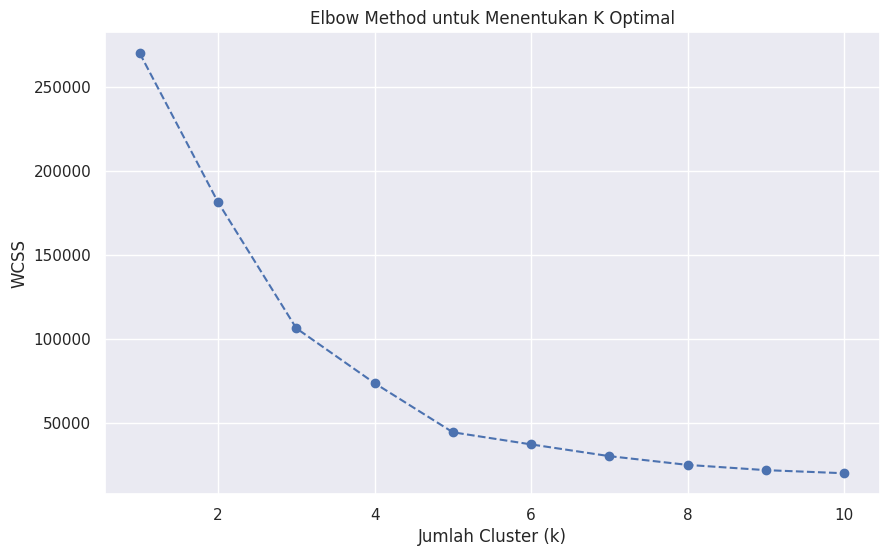

In [63]:
# List untuk menyimpan nilai WCSS (inertia) untuk setiap k
wcss = []

# Loop untuk mencoba k dari 1 sampai 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ adalah nilai WCSS

# Membuat plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Membangun dan menjalankan model K-Means final menggunakan jumlah k terbaik (yaitu 5)

In [65]:
# Menjalankan K-Means dengan k terbaik, yaitu 5
k_terbaik = 5
kmeans_final = KMeans(n_clusters=k_terbaik, init='k-means++', random_state=42, n_init=10)

# Melatih model dan memprediksi cluster untuk setiap data point
y_kmeans = kmeans_final.fit_predict(X)

# Menambahkan hasil cluster ke DataFrame asli untuk analisis (opsional)
df['Cluster'] = y_kmeans
print("\nData dengan Hasil Cluster:")
print(df.head())


Data dengan Hasil Cluster:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


Membuat scatter plot untuk hasil clustering

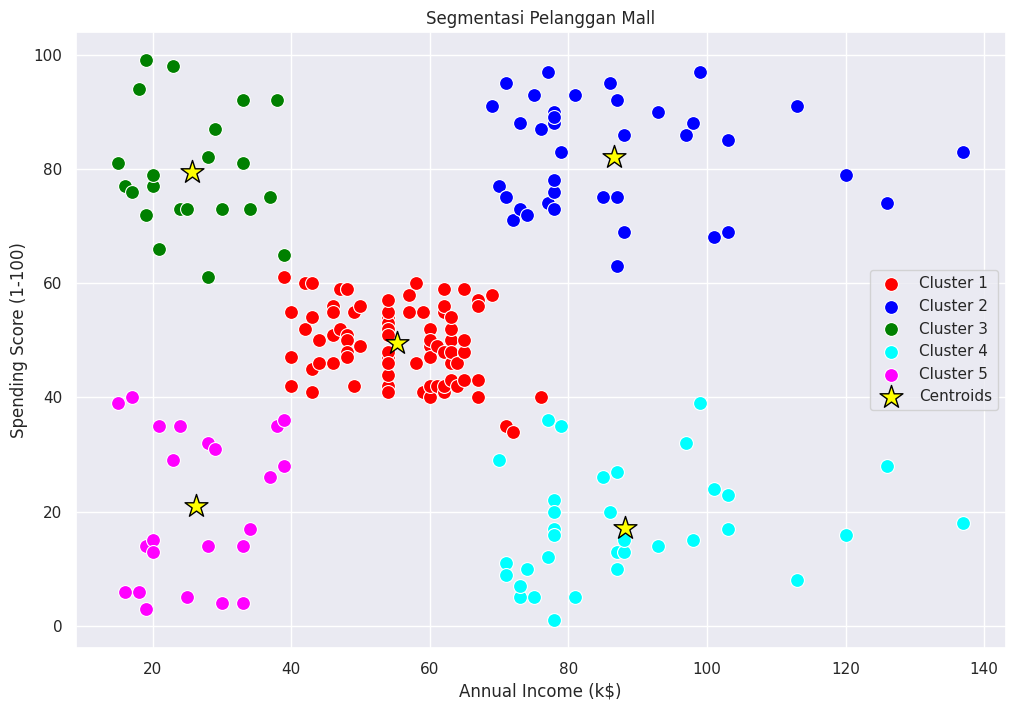

In [66]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='red', label='Cluster 1', s=100)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=100)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=100)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='cyan', label='Cluster 4', s=100)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='magenta', label='Cluster 5', s=100)

# Plot titik pusat (centroid) dari setiap cluster
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='*', edgecolors='black')

plt.title('Segmentasi Pelanggan Mall')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

### Tugas **DBSCAN**

In [67]:
X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# 2. Normalisasi data
# Ini penting agar parameter 'eps' bekerja secara konsisten
X = StandardScaler().fit_transform(X)

print("Dataset berhasil dibuat dan dinormalisasi.")
print("Bentuk data (X):", X.shape)

Dataset berhasil dibuat dan dinormalisasi.
Bentuk data (X): (1000, 2)


In [68]:
# Menjalankan model DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Menghitung jumlah cluster (mengabaikan noise point, yaitu label -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimasi Jumlah Cluster: {n_clusters_}")
print(f"Estimasi Jumlah Noise Points: {n_noise_}")
print("-" * 30)

# Evaluasi Kualitas Clustering
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index (ARI): {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information (AMI): {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimasi Jumlah Cluster: 2
Estimasi Jumlah Noise Points: 0
------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index (ARI): 1.000
Adjusted Mutual Information (AMI): 1.000
Silhouette Coefficient: 0.391


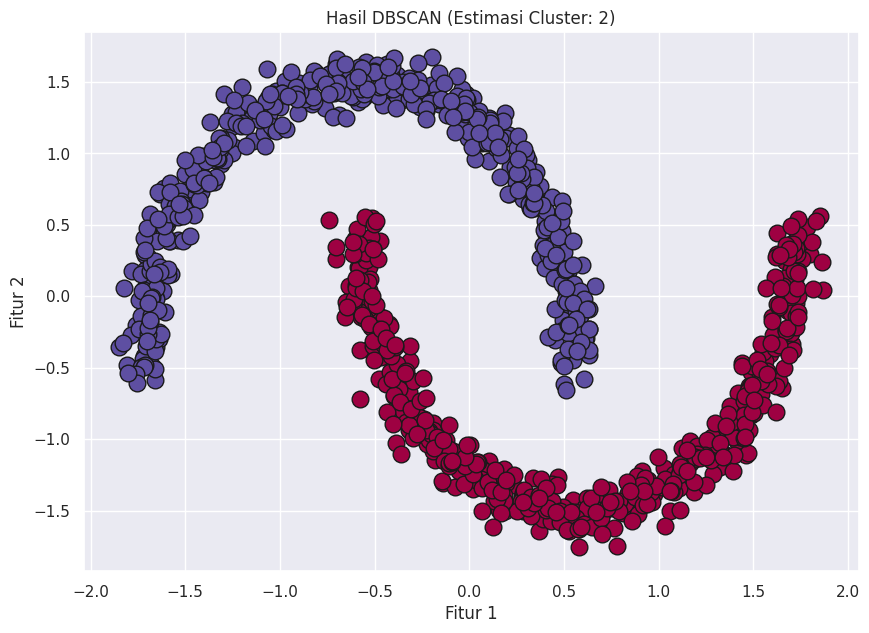

In [69]:
# Membuat mask untuk membedakan core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 7))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Warna hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Plot core samples (titik besar)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=12)

    # Plot non-core samples (titik kecil)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)

plt.title(f'Hasil DBSCAN (Estimasi Cluster: {n_clusters_})')
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True)
plt.show()

In [70]:
# List parameter untuk diuji
eps_list = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_list = [3, 5, 10, 20]

# Wadah untuk menyimpan hasil
results = []

print("Memulai eksperimen...")
for eps in eps_list:
    for min_samples in min_samples_list:
        # Jalankan DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        # Hitung jumlah cluster dan noise
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        # Hitung metrik evaluasi (hindari error jika hanya 1 cluster)
        if n_clusters_ > 1:
            silhouette = metrics.silhouette_score(X, labels)
        else:
            silhouette = -1 # Nilai default jika silhouette tidak bisa dihitung

        # Simpan hasil
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters_,
            'n_noise': n_noise_,
            'Silhouette': silhouette,
            'V-measure': metrics.v_measure_score(labels_true, labels),
            'ARI': metrics.adjusted_rand_score(labels_true, labels)
        })

# Konversi hasil ke DataFrame Pandas untuk tampilan yang rapi
results_df = pd.DataFrame(results)

print("Eksperimen selesai.")
results_df

Memulai eksperimen...
Eksperimen selesai.


,eps,min_samples,n_clusters,n_noise,Silhouette,V-measure,ARI
0,0.05,3,69,186,0.112929,0.257021,0.030044
1,0.05,5,61,386,-0.048518,0.224021,0.015642
2,0.05,10,3,970,-0.294190,0.049389,0.002283
3,0.05,20,0,1000,-1.000000,0.000000,0.000000
4,0.10,3,2,14,0.251690,0.942714,0.972179
5,0.10,5,3,19,0.290689,0.769420,0.758440
6,0.10,10,7,57,0.162306,0.571132,0.523399
7,0.10,20,6,850,-0.360195,0.154693,0.016754
8,0.20,3,2,0,0.391160,1.000000,1.000000
9,0.20,5,2,0,0.391160,1.000000,1.000000
